In [105]:
import numpy as np
import h5py
import cv2
import matplotlib.pyplot as plt
import keras
from keras.utils import np_utils
from IPython.display import clear_output
from keras.layers import Conv2D, Dense, MaxPooling2D, Input,Flatten, Dropout
from keras.models import Sequential
from  keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

In [2]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [3]:
def load_dataset():
    train = h5py.File('./datasets/train_signs.h5')
    test = h5py.File('./datasets/test_signs.h5')
    keys = keys = [k for k in train]
    
    train_x = train['train_set_x'].value
    train_y = train['train_set_y'].value
    
    test_x = test['test_set_x'].value
    test_y = test['test_set_y'].value
    
    list_classes = train['list_classes'].value
    
    print("Shape of train X : ",train_x.shape)
    print("Shape of train Y : ",train_y.shape)
    print("Shape of test X : ",test_x.shape)
    print("Shape of test Y :",test_y.shape)
    
    return train_x,train_y, test_x,test_y, list_classes

In [4]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

Shape of train X :  (1080, 64, 64, 3)
Shape of train Y :  (1080,)
Shape of test X :  (120, 64, 64, 3)
Shape of test Y : (120,)


In [5]:
### Normalize the imputs
X_train = X_train_orig/255
X_test = X_test_orig/255

In [6]:
## One hot encoding for target variable
y_train = np_utils.to_categorical(Y_train_orig)
y_test = np_utils.to_categorical(Y_test_orig)

In [7]:
### Check shape of data
X_train.shape, y_train.shape

((1080, 64, 64, 3), (1080, 6))

In [8]:
X_test.shape, y_test.shape

((120, 64, 64, 3), (120, 6))

In [96]:
# ### Model Building 
## Test Accuracy : 97.5
# model = Sequential()
# model.add(Conv2D(16,(5,5),input_shape = X_train.shape[1:],activation='relu'))
# model.add(MaxPooling2D((3,3),strides=2))

# model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
# model.add(MaxPooling2D((3,3),strides=2))

# model.add(Conv2D(32,(3,3),activation='relu'))
# model.add(MaxPooling2D((3,3),strides=2))
          
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D((3,3),strides=2))
          
# model.add(Flatten())
# model.add(Dense(80,activation='relu'))
# model.add(Dropout(.35))
# model.add(Dense(6,activation='softmax'))

In [152]:
### Model Building
model = Sequential()
model.add(Conv2D(16,(5,5),input_shape = X_train.shape[1:],activation='relu'))
model.add(MaxPooling2D((3,3),strides=2))

model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
model.add(MaxPooling2D((3,3),strides=2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((3,3),strides=2))
          
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((3,3),strides=2))
          
model.add(Flatten())
model.add(Dense(80,activation='relu'))
model.add(Dropout(.35))
model.add(Dense(6,activation='softmax'))

In [153]:
adam = Adam(lr=.0001)
model.compile(optimizer=adam,loss=keras.losses.categorical_crossentropy,metrics =['accuracy'])

In [154]:
# model.fit(X_train,y_train,batch_size=128,epochs=300,validation_data=(X_test,y_test),callbacks=[plot_losses])

In [155]:
### data argumentation
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

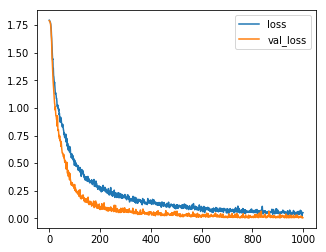

In [156]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train)/32,
                    epochs=1000,
                    validation_data=(X_test,y_test),
                    callbacks=[plot_losses])

In [157]:
model.evaluate(X_train,y_train)

1080/1080 [==============================] - 1s 995us/step


[0.008477459485746092, 0.9981481481481481]

In [158]:
model.evaluate(X_test,y_test)

120/120 [==============================] - 0s 1ms/step


[0.006175982230342924, 1.0]

In [ ]:
# model.save('hand_recognition.h5')